
# **Cognifyz**
*INTERNSHIP PROGRAM*

Machine Learning


---



---
Author : Steven Roy V

Email: steven.roy@stat.christuniversity.in


---



---



### Exploratory Data Analysis AND VISUALIZATION

In [52]:
## Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as exp

In [53]:
#Importing the restaurant dataset
df=pd.read_csv("/content/drive/MyDrive/SPD/Dataset  (1).csv")
print(df.head(3)) #print the first three rowa of data to get an idea of the data

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandalu

In [54]:
#checking the dimension of the data
print(df.shape)

(9551, 21)


The dataset contains 9551 rows and 21 columns.

In [55]:
#checking for null values
df.isnull().values.any()
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are 9 null values in the cuisine feature.
We will deal with them by removing them as the number of null values is negligible.

In [56]:
df.dropna(inplace=True)
print(df.shape)

(9542, 21)


The updated dataset contains 9542 rows and 21 columns.

In [57]:
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [58]:
#To get to know the datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

STATISTICAL SUMMARY OF THE VARIABLES

In [59]:
numerical_summary = df[['Average Cost for two', 'Aggregate rating', 'Votes',]].describe()
print(numerical_summary)

       Average Cost for two  Aggregate rating         Votes
count           9542.000000       9542.000000   9542.000000
mean            1200.326137          2.665238    156.772060
std            16128.743876          1.516588    430.203324
min                0.000000          0.000000      0.000000
25%              250.000000          2.500000      5.000000
50%              400.000000          3.200000     31.000000
75%              700.000000          3.700000    130.000000
max           800000.000000          4.900000  10934.000000


In [60]:
categorical_summary = df[['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Price range', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']].describe(include=['object'])
print(categorical_summary)


        Restaurant Name       City                     Address  \
count              9542       9542                        9542   
unique             7437        140                        8910   
top     Cafe Coffee Day  New Delhi  Dilli Haat, INA, New Delhi   
freq                 83       5473                          11   

               Locality            Locality Verbose      Cuisines  \
count              9542                        9542          9542   
unique             1206                        1263          1825   
top     Connaught Place  Connaught Place, New Delhi  North Indian   
freq                122                         122           936   

                  Currency Has Table booking Has Online delivery  \
count                 9542              9542                9542   
unique                  12                 2                   2   
top     Indian Rupees(Rs.)                No                  No   
freq                  8652              8384       

DATA VISUALIZATION

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming df is your DataFrame containing the restaurant data

# Encode categorical variables
label_encoders = {}
categorical_column = ['City', 'Locality', 'Currency','Country Code','Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Switch to order menu', 'Rating color', 'Rating text']
categorical_columns = ['City', 'Locality', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Switch to order menu', 'Rating color', 'Rating text']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Display the mapping between original and encoded values
mapping_dict = {}
for column in categorical_columns:
    mapping_dict[column] = dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))
    print(f"Mapping for {column}:")
    print(mapping_dict[column])
    print()



Mapping for City:
{'Abu Dhabi': 0, 'Agra': 1, 'Ahmedabad': 2, 'Albany': 3, 'Allahabad': 4, 'Amritsar': 5, 'Ankara': 6, 'Armidale': 7, 'Athens': 8, 'Auckland': 9, 'Augusta': 10, 'Aurangabad': 11, 'Balingup': 12, 'Bandung': 13, 'Bangalore': 14, 'Beechworth': 15, 'Bhopal': 16, 'Bhubaneshwar': 17, 'Birmingham': 18, 'Bogor': 19, 'Boise': 20, 'Bras�_lia': 21, 'Cape Town': 22, 'Cedar Rapids/Iowa City': 23, 'Chandigarh': 24, 'Chatham-Kent': 25, 'Chennai': 26, 'Clatskanie': 27, 'Cochrane': 28, 'Coimbatore': 29, 'Colombo': 30, 'Columbus': 31, 'Consort': 32, 'Dalton': 33, 'Davenport': 34, 'Dehradun': 35, 'Des Moines': 36, 'Dicky Beach': 37, 'Doha': 38, 'Dubai': 39, 'Dubuque': 40, 'East Ballina': 41, 'Edinburgh': 42, 'Faridabad': 43, 'Fernley': 44, 'Flaxton': 45, 'Forrest': 46, 'Gainesville': 47, 'Ghaziabad': 48, 'Goa': 49, 'Gurgaon': 50, 'Guwahati': 51, 'Hepburn Springs': 52, 'Huskisson': 53, 'Hyderabad': 54, 'Indore': 55, 'Inner City': 56, 'Inverloch': 57, 'Jaipur': 58, 'Jakarta': 59, 'Johannesb

   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           4824             3748             6    73     8685       171   
1           4814             3172             6    73     6055       593   
2           4810             2896             6    75     4684       308   
3           4827             4707             6    75     8690       862   
4           4820             5523             6    75     8689       862   

   Locality Verbose  Longitude  Latitude  Cuisines  ...  Currency  \
0               172       8042       384       920  ...         0   
1               601       8041       382      1111  ...         0   
2               314       8053       388      1671  ...         0   
3               875       8050       391      1126  ...         0   
4               875       8055       390      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1                    0                  0   


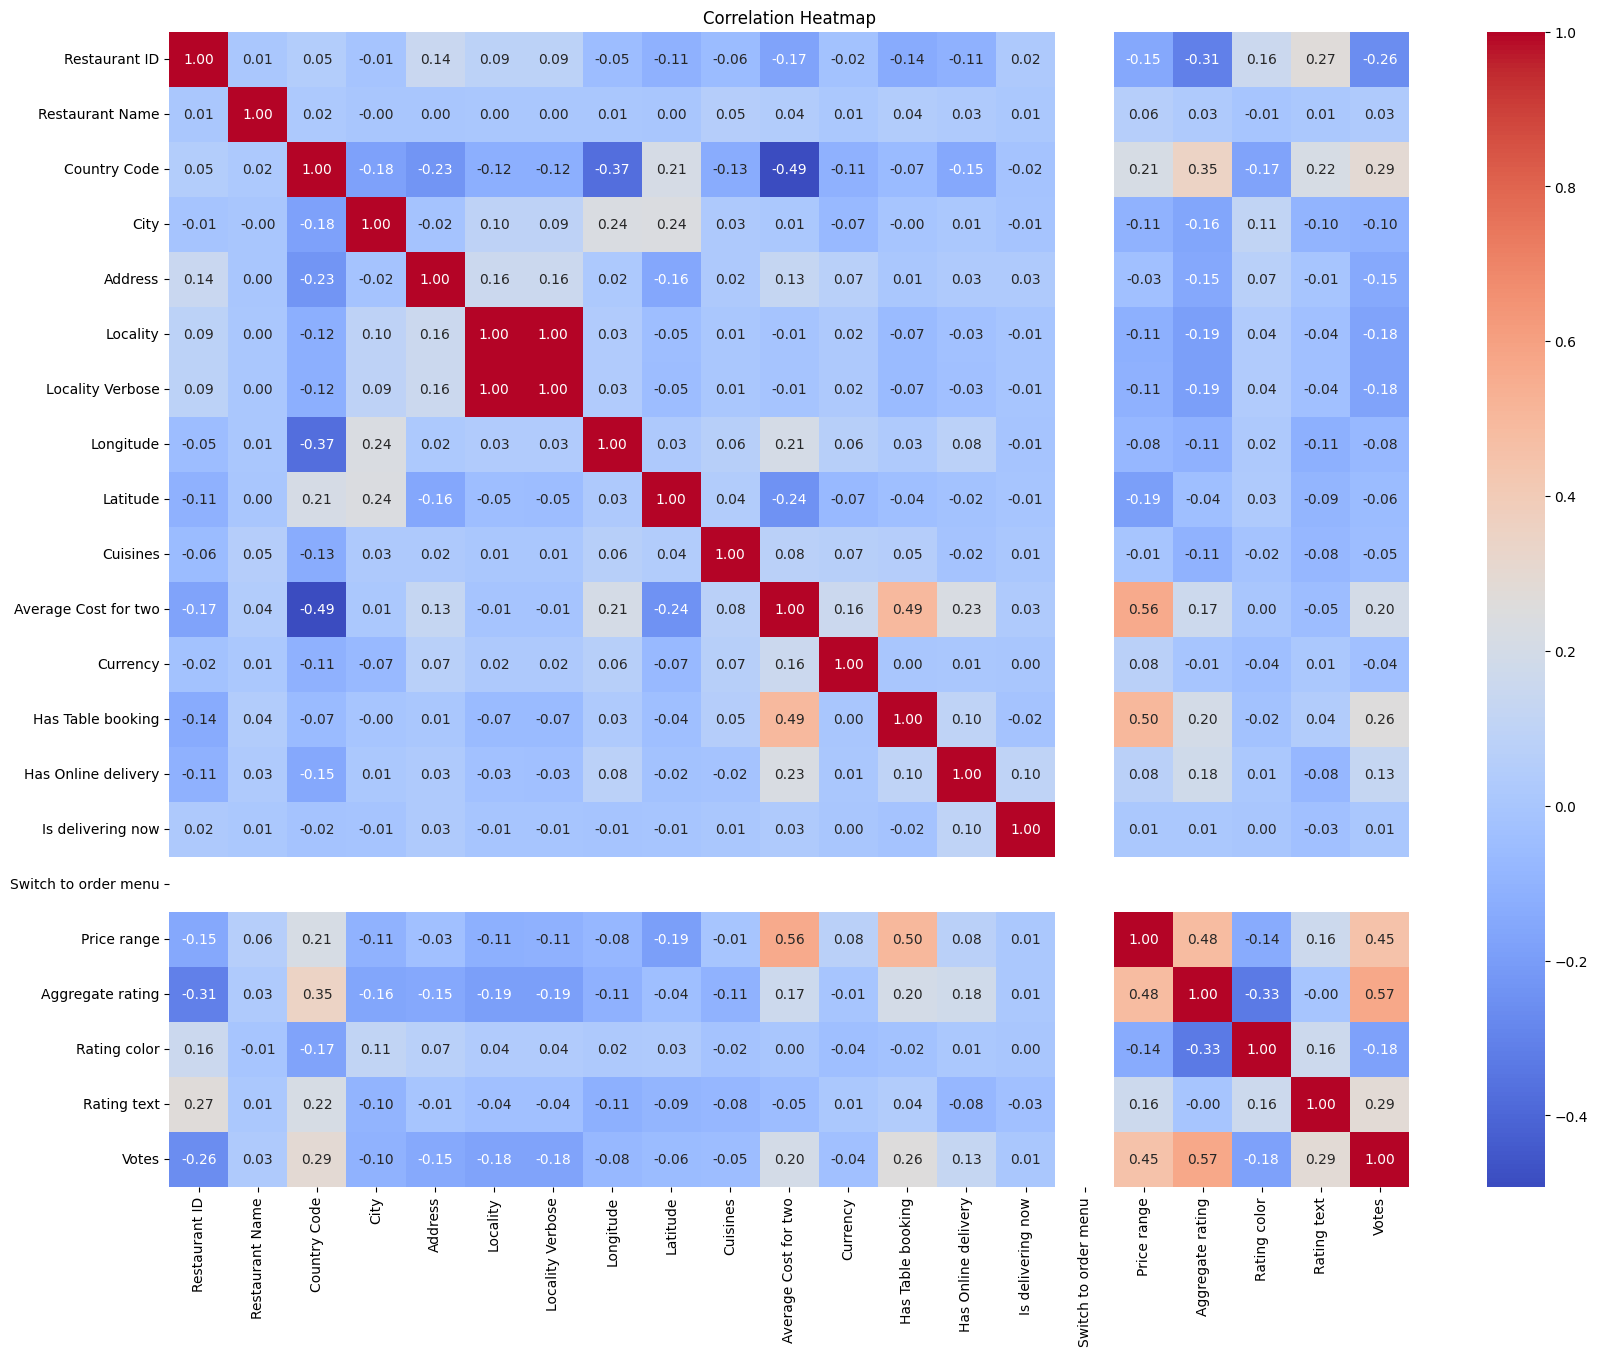

Aggregate rating        1.000000
Votes                   0.569276
Price range             0.484499
Country Code            0.347764
Rating color            0.329945
Restaurant ID           0.309678
Has Table booking       0.196435
Locality                0.191393
Locality Verbose        0.189914
Has Online delivery     0.179281
Average Cost for two    0.166273
City                    0.160241
Address                 0.152976
Longitude               0.111688
Cuisines                0.106243
Latitude                0.041361
Restaurant Name         0.027926
Is delivering now       0.010547
Currency                0.005375
Rating text             0.004208
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64
Index(['Aggregate rating', 'Votes', 'Price range', 'Country Code',
       'Rating color', 'Restaurant ID', 'Has Table booking', 'Locality',
       'Locality Verbose', 'Has Online delivery', 'Average Cost for two',
       'City', 'Address', 'Longitude', 'Cuisines'],
  

In [77]:
df3=pd.read_csv("/content/drive/MyDrive/SPD/Dataset  (1).csv")

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Convert data to a DataFrame if it is not already
if not isinstance(df3, pd.DataFrame):
    df3 = pd.DataFrame(df3)

# Apply LabelEncoder to each column
df_3 = df3.apply(LabelEncoder().fit_transform)

print(df_3.head())



# Calculate the correlation matrix
correlation_matrix = df_3.corr()

# Create and visualize the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Extract features with high correlation with the target variable
target_correlation = correlation_matrix['Aggregate rating'].abs().sort_values(ascending=False)
print(target_correlation)
significant_features = target_correlation[target_correlation > 0.1].index

# threshold can be adjusted

print(significant_features)

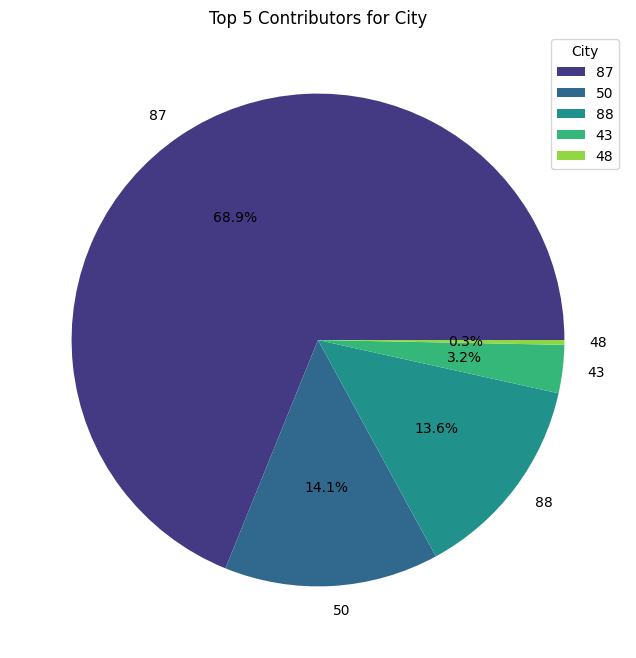

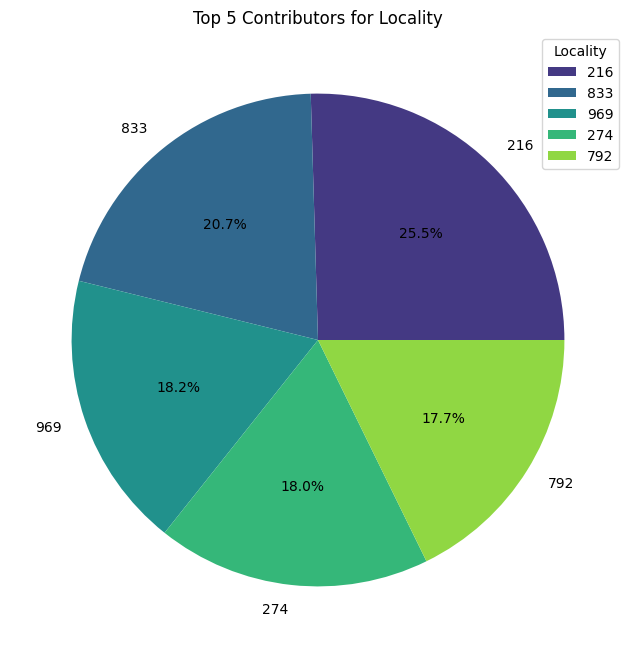

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


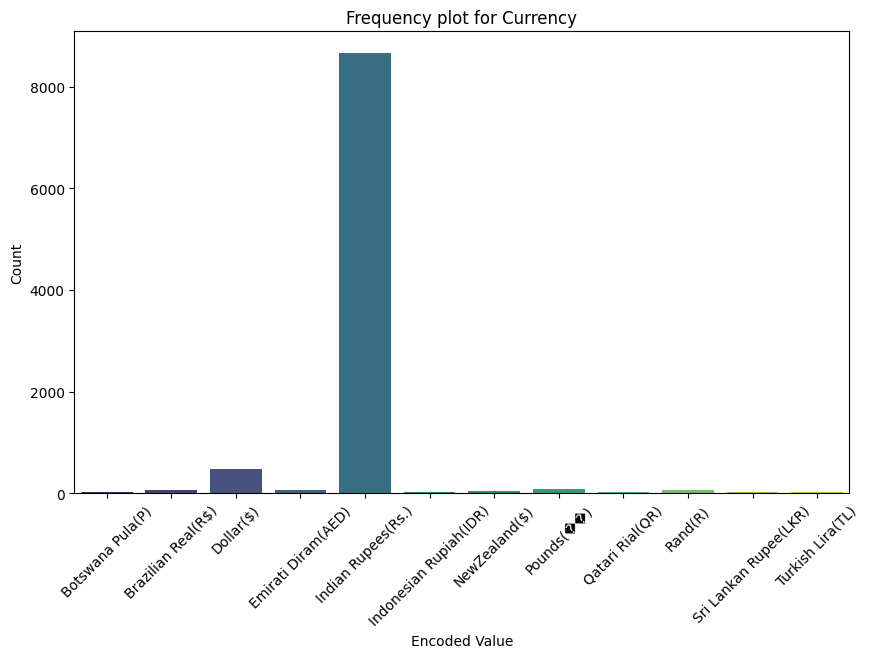

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


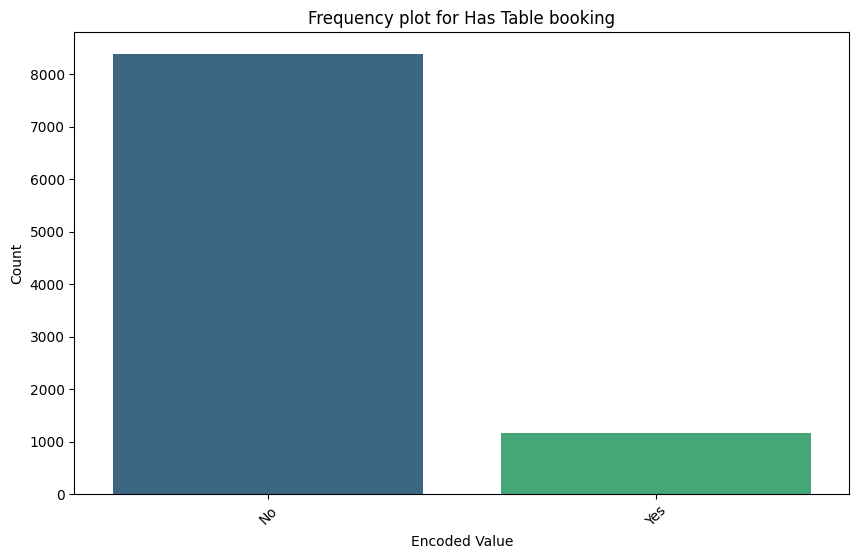

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


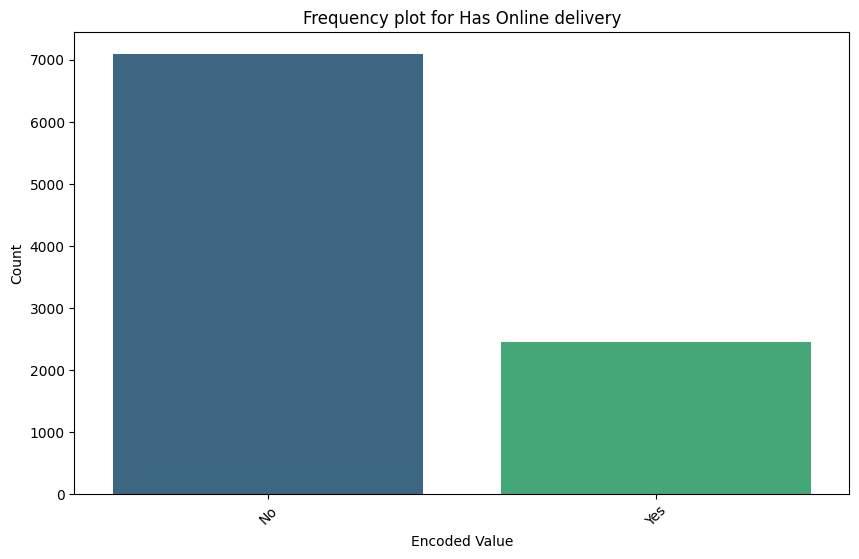

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


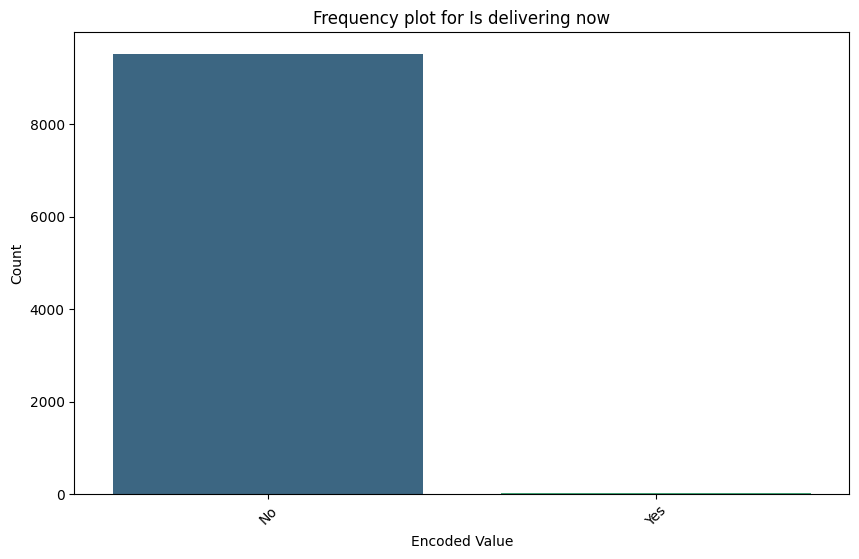

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


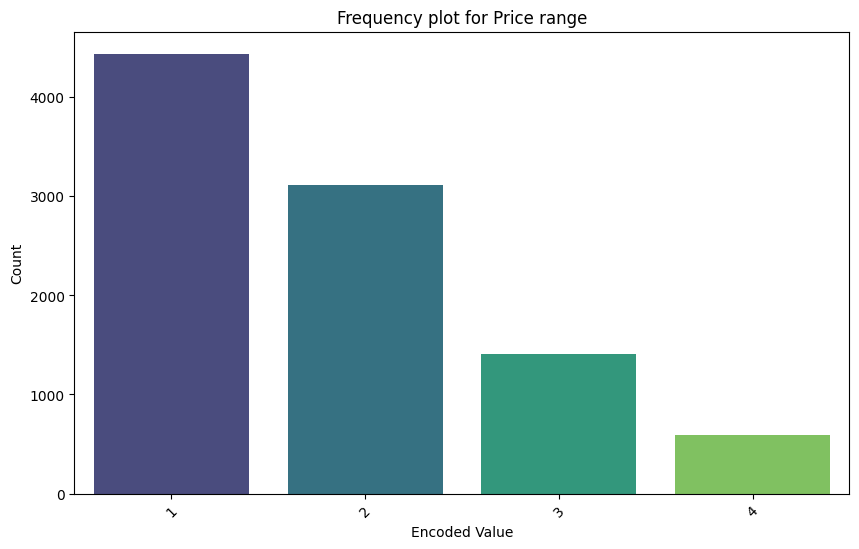

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


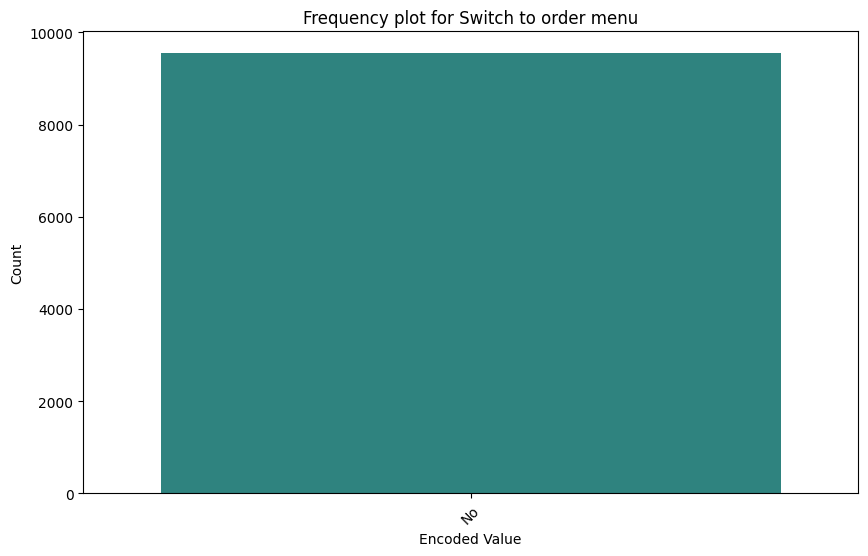

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


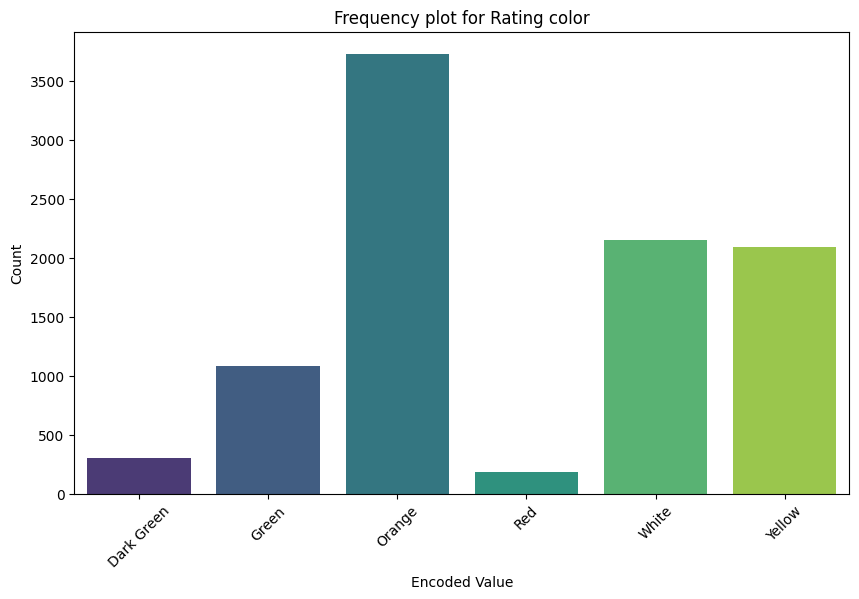

<ipython-input-63-d47b550a8976>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))


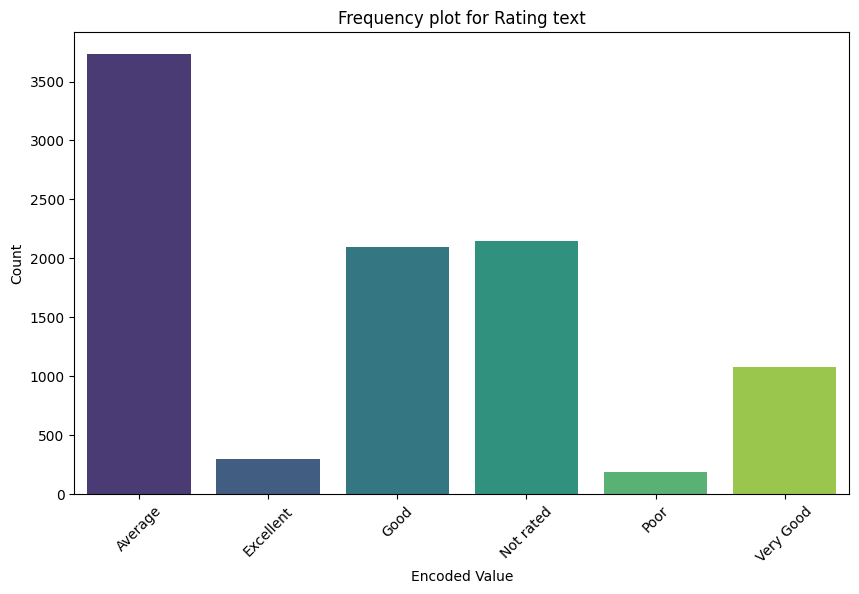

In [63]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_label_mapping(mapping, column_name):
    keys = list(mapping.keys())
    values = list(mapping.values())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=values, y=keys, palette='viridis')
    plt.title(f'Mapping for {column_name}')
    plt.xlabel('Encoded Value')
    plt.ylabel('Original Value')
    plt.show()

def plot_top_5_pie_chart(data, column_name):
    top_5 = data[column_name].value_counts().nlargest(5)
    top_5_percent = top_5 / top_5.sum() * 100

    plt.figure(figsize=(8, 8))
    plt.pie(top_5_percent, labels=top_5.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_5)))
    plt.title(f'Top 5 Contributors for {column_name}')
    plt.legend(top_5.index, title=column_name)
    plt.show()

def plot_frequency_count(data, column_name, mapping):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name, palette='viridis', order=sorted(mapping.values()))
    plt.title(f'Frequency plot for {column_name}')
    plt.xlabel('Encoded Value')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(mapping)), labels=[k for k, v in sorted(mapping.items(), key=lambda item: item[1])], rotation=45)
    plt.show()

# Plotting the top 5 pie charts for 'City' and 'Locality'
plot_top_5_pie_chart(df, 'City')
plot_top_5_pie_chart(df, 'Locality')

# Plotting frequency counts for specified categorical columns with their mappings

for column in ['Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Switch to order menu', 'Rating color', 'Rating text']:
    plot_frequency_count(df, column, mapping_dict[column])


In [66]:
# Split the 'Cuisines' column into multiple boolean columns
cuisine_types = df['Cuisines'].str.get_dummies(',')
dfc = pd.concat([df, cuisine_types], axis=1)
print(dfc.head(5))
# Scale numerical variables
numerical_column = ['Average Cost for two', 'Aggregate rating', 'Votes', 'Longitude', 'Latitude']
numerical_columns = ['Average Cost for two','Votes']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
dfc[numerical_columns] = scaler.fit_transform(dfc[numerical_columns])


   Restaurant ID         Restaurant Name  Country Code  City  \
0        6317637        Le Petit Souffle           162    73   
1        6304287        Izakaya Kikufuji           162    73   
2        6300002  Heat - Edsa Shangri-La           162    75   
3        6318506                    Ooma           162    75   
4        6314302             Sambo Kojin           162    75   

                                             Address  Locality  \
0  Third Floor, Century City Mall, Kalayaan Avenu...       171   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...       592   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...       308   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...       860   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...       860   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.01

## Task 1: Predict Restaurant Ratings
Objective: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Specify the features to exclude and the target feature
features_to_exclude = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines']
target_feature = 'Aggregate rating'

# Define X and y
X = dfc.drop(columns=features_to_exclude + [target_feature])
y = dfc[target_feature]

# Define the features for the feature importance
features = X.columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(name, model, params=None):
    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R-squared: {r2}")

    if hasattr(best_model, 'coef_'):
        coef = best_model.coef_
        feature_importance = pd.DataFrame({'Feature': features, 'Importance': coef})
    elif hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})

    if name in ['Linear Regression', 'Ridge Regression']:
        # For Linear Regression, use OLS to get p-values
        X_train_sm = sm.add_constant(X_train)
        ols_model = sm.OLS(y_train, X_train_sm).fit()
        print(f"\n{name} OLS Summary:")
        print(ols_model.summary())
        feature_importance['P-Value'] = ols_model.pvalues[1:]  # Exclude the constant term p-value

    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print(f"\n{name} Feature Importance:\n", feature_importance.head(10))

# Define models and their hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]})
}

# Train and evaluate models
for name, (model, params) in models.items():
    print(f"Training {name}...")
    evaluate_model(name, model, params)
    print("\n" + "-"*40 + "\n")


Training Linear Regression...
Linear Regression - MSE: 9.081317420157536e+19, R-squared: -3.965585032227794e+19

Linear Regression OLS Summary:
                            OLS Regression Results                            
Dep. Variable:       Aggregate rating   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     28.13
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:38:39   Log-Likelihood:                -11482.
No. Observations:                7633   AIC:                         2.346e+04
Df Residuals:                    7385   BIC:                         2.518e+04
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|  

From the above models we can see that the decision tree algorithm and random forest algorithm performs best in predicting the ratings based on its R2 and MSE values.

Also it is found that the features,

*   Votes
*   Rating color
*   Rating text
*   Average cost for two
*   Has online delivery

are significant features.

# TASK 2 : RESTAURANT RECOMMENDATION
Objective: Create a restaurant recommendation
system based on user preferences.


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Load and Preprocess Dataset
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SPD/Dataset  (1).csv')
data.dropna(inplace=True)

# Drop unnecessary columns
data = data.drop(['Restaurant ID', 'Country Code', 'Address', 'Locality', 'Locality Verbose',
                  'Longitude', 'Latitude', 'Currency', 'Rating color', 'Rating text'], axis=1)

# Step 2: Feature Extraction
# For simplicity, we'll consider Cuisines, Average Cost for two, Has Table booking, Has Online delivery, Is delivering now,
# Switch to order menu, Price range, and Votes as features
features = ['Cuisines', 'Average Cost for two', 'Has Table booking', 'Has Online delivery',
            'Is delivering now', 'Switch to order menu', 'Price range', 'Votes']

# Fill missing values
data = data.fillna('')

# Combine features into a single text column
data['features'] = data[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Step 3: User Profile Creation
# Gather user input for their preferences
def get_user_input():
    cuisines = input("Enter preferred cuisines (comma separated): ").split(',')
    average_cost = input("Enter preferred average cost for two: ")
    price_range = input("Enter preferred price range (1-4): ")
    has_table_booking = input("Do you prefer restaurants with table booking? (Yes/No): ")
    has_online_delivery = input("Do you prefer restaurants with online delivery? (Yes/No): ")
    is_delivering_now = input("Do you prefer restaurants delivering now? (Yes/No): ")
    switch_to_order_menu = input("Do you prefer restaurants with switch to order menu option? (Yes/No): ")

    user_preferences = {
        'Cuisines': cuisines,
        'Average Cost for two': average_cost,
        'Price range': price_range,
        'Has Table booking': has_table_booking,
        'Has Online delivery': has_online_delivery,
        'Is delivering now': is_delivering_now,
        'Switch to order menu': switch_to_order_menu
    }
    return user_preferences

# Step 4: Compute Similarity
# TF-IDF vectorization for features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Step 5: Recommendation
# Compute similarity scores between user preferences and restaurants
def recommend_restaurants(user_preferences, cosine_sim=cosine_sim, data=data):
    # Create user profile string
    user_profile = ' '.join([str(value) for value in user_preferences.values()])

    # Compute similarity scores for the user profile against all restaurant profiles
    user_tfidf = tfidf.transform([user_profile])
    similarity_scores = linear_kernel(user_tfidf, tfidf_matrix).flatten()

    # Sort restaurants based on similarity scores
    top_indices = similarity_scores.argsort()[-10:][::-1]

    # Return recommended restaurants
    return data.iloc[top_indices]

# Get user preferences
user_preferences = get_user_input()

# Get recommended restaurants for the user
recommended_restaurants = recommend_restaurants(user_preferences)
print(recommended_restaurants[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'Votes']])


Enter preferred cuisines (comma separated): French, Asian
Enter preferred average cost for two: 1500
Enter preferred price range (1-4): 3
Do you prefer restaurants with table booking? (Yes/No): Yes
Do you prefer restaurants with online delivery? (Yes/No): No
Do you prefer restaurants delivering now? (Yes/No): Yes
Do you prefer restaurants with switch to order menu option? (Yes/No): No
                       Restaurant Name                            Cuisines  \
4812              Chez Jerome - Q Cafe                        Cafe, French   
4978                           Chinois                               Asian   
1518  The Atrium - By Jukaso It Suites                       Asian, Bakery   
4024         The Hub -  ibis New Delhi                        North Indian   
5188                         Suribachi    Asian, North Indian, Continental   
9150                        Le Dupleix   North Indian, French, Continental   
6702                  Caf�� Foreground  Cafe, Asian, Italian, Nort

The above system implements a restaurant recommendation system that utilizes user input to tailor suggestions. It preprocesses a dataset, combines relevant features, and prompts users to input their preferences regarding cuisines, cost, and restaurant features. Using TF-IDF vectorization and cosine similarity, the system computes similarity scores between user preferences and restaurant profiles, subsequently recommending the top 10 restaurants that best match the user's input. The inclusion of user input is vital as it enables personalized recommendations, enhancing user satisfaction and relevance of the suggestions, ultimately improving the effectiveness and usability of the recommendation system.

#TASK 3 : CUSINE CLASSIFICATION
Objective: Develop a machine learning model to
classify restaurants based on their cuisines.

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

df1= pd.read_csv("/content/drive/MyDrive/SPD/Dataset  (1).csv")
df1.dropna(inplace=True)

# Encoding categorical variables
df1["Has Table booking"] = df1["Has Table booking"].map({"Yes": 1, "No": 0})
df1["Has Online delivery"] = df1["Has Online delivery"].map({"Yes": 1, "No": 0})
label_encoder = LabelEncoder()

# Simplify "Cuisines" to the first cuisine listed
df1["Cuisines"] = df1["Cuisines"].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Remove rows with empty "Cuisines" after simplification
df1 = df1[df1["Cuisines"] != ""]

# Encode "Cuisines"
df1["Cuisines"] = label_encoder.fit_transform(df1["Cuisines"])

# Define features (X) and target (y)
X = df1[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range", "Aggregate rating", "Votes"]]
y = df1["Cuisines"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro', zero_division=0)
    classification_rep = classification_report(
        y_test, predictions,
        labels=np.unique(y_test),
        target_names=label_encoder.inverse_transform(np.unique(y_test)),
        zero_division=0
    )
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Classification Report": classification_rep
    }

# Display results
for name, metrics in results.items():
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])

# Determine the best classifier based on accuracy
best_classifier = max(results, key=lambda k: results[k]['Accuracy'])
print(f"\nBest Classifier: {best_classifier} with Accuracy: {results[best_classifier]['Accuracy']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classifier: KNN
Accuracy: 0.2488
Precision: 0.0740
Recall: 0.0561
Classification Report:
                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
       American       0.12      0.33      0.18        55
         Andhra       0.00      0.00      0.00         1
          Asian       0.00      0.00      0.00        17
   Asian Fusion       0.00      0.00      0.00         1
            BBQ       0.00      0.00      0.00         5
         Bakery       0.10      0.18      0.13       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.00      0.00      0.00        13
        Biryani       0.00      0.00      0.00        22
      Brazilian       0.00      0.00      0.00         4
      Breakfast       0.00      0.00      0.00         3
        British       0.00      0.00      0.00         4
         Burger       0.00      0.00      0.00        

Accuracy represents the proportion of correctly classified instances out of all instances.
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It indicates the model's ability not to label a negative sample as positive.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It shows the model's ability to find all the positive samples.
Classification Report:

The classification report provides a comprehensive view of the model's performance, including precision, recall, and F1-score for each class.
Best Classifier:

Based on accuracy, the best classifier is the one with the highest accuracy score. In this case, the logistic regression classifier has the highest accuracy.
From the  output, it seems that logistic regression has the highest accuracy among the classifiers tested. However, the precision and recall scores for all classifiers are quite low. This indicates that the models are struggling to correctly classify the restaurant cuisines, possibly due to the complexity of the task or the limited features used for classification.